In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

**Ex. 0.**: Please get yourself familiar with the data.

In [79]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [80]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    100 non-null    float64
 1   Exam 2    100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


**Ex. 1.:** Please follow the steps below:

    add a column with values '1'
    divide the data into parameters (X) and labels/classes (y)
    data conversion to numpy ( np.array )


In [82]:
X = data.iloc[:,:2]
Y = data.iloc[:,2]

X.insert(0, 'Theta0', 1)

In [83]:
X = np.array(X.values, dtype=float)
Y = np.array(Y.values, dtype=float)


**Ex. 2.:** Please plot the loaded data in the graph (using scatter plot). Can be both: a 2D plot with marks colored regarding to the class or a 3D plot with the class showed as 3rd dimension.

In [84]:
Addmitted = data[data['Admitted']==1]
NotAddmitted = data[data['Admitted']==0]

In [85]:
Addmitted = np.array(Addmitted.values, dtype=float)
NotAddmitted = np.array(NotAddmitted.values, dtype=float)

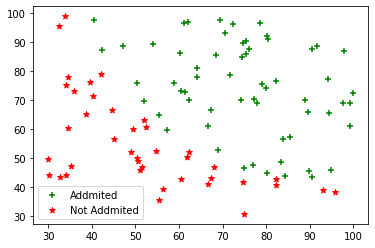

In [86]:
plt.figure()
plt.scatter(Addmitted[:,0], Addmitted[:,1], c='g', marker="+")
plt.scatter(NotAddmitted[:,0], NotAddmitted[:,1], c='r', marker="*")
plt.legend(["Addmited", "Not Addmited"])
plt.show()

**Ex. 3.:** Earlier, we said that we want our hθ(x) classifier to match the property: 

In [87]:
def sig(t):
 return 1 / (1 + np.exp(-t))

**Ex. 4.:** Using the function np.arange or np.linspace, please generate data from the range [-5.5], step 0.5 and check the correct operation of the implemented function by plotting it. 

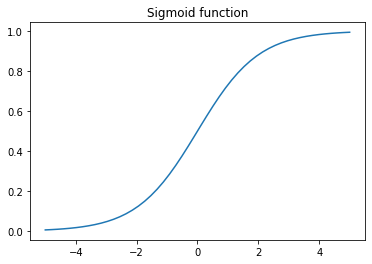

In [88]:
x = np.linspace(-5, 5)

plt.figure()
plt.plot(x, sig(x))
plt.title('Sigmoid function')
plt.show()

**Ex. 5.** Based on the above formulas, please implement the cost function J (recommended vectorized solution):

In [89]:
def cost(theta, X, y):
  m = y.shape[0]
  h = sig(X @ theta)
  return 1/m * np.sum(-y.T @ np.log(h) - (1 - y).T @ np.log(1 - h))



In [90]:
theta = np.zeros((3,1))
print(cost(theta, X, Y))

0.6931471805599453


**Ex. 6.:** Please implement simple gradient function:

In [91]:
def simple_gradient(X, y, theta, alpha, it):
  # it - number of iterations
  theta = theta.reshape(-1 ,1)
  y = y.reshape((-1,1))
  m = y.shape[0]
  theta = np.copy(theta)
  cost_history = list()
  for i in range(it):
    J = cost(theta, X, y)
    cost_history.append(J)
    h = sig(X @ theta)
    theta = theta - alpha * (1/m) * X.T @ (h - y)
  cost_history.append(cost(theta, X, y))
  return theta, cost_history

In [92]:
theta = np.zeros((3,1))
theta[0] = 100
theta

array([[100.],
       [  0.],
       [  0.]])

In [93]:
alpha = 1
it = 150
theta = np.zeros((3,1))

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X)
# X = scaler.transform(X)
X[:,1:] = (X[:,1:] - X[:,1:].mean(0)) / X[:,1:].std(0)

theta, cost_out = simple_gradient(X, Y, theta, alpha, it)
print(theta, cost_out[-1])

[[1.41957362]
 [3.35941597]
 [3.11271333]] 0.2064071430444978


**Ex. 7.**: Please present the accuracy of the algorithm performance. Prediction values will be in the range [0; 1]. Threshold value = 0.5. 

In [94]:
predictions = ((X @ theta) > 0.5).astype(int)


In [95]:
dif = Y - predictions.T
print(f"Accuracy: {(1 - np.abs(dif).sum() / predictions.shape[0]) * 100}%")

Accuracy: 88.0%


**Ex. 8.:** [Additional task] It is sometimes useful to be able to visualize the boundary line dividing the input space in which points are classified as belonging to the class of interest (y=1) from that space in which point do not (y=0). 

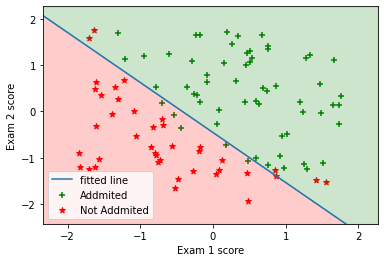

In [96]:
plt.figure()
plt.scatter(X[Y==1,1], X[Y==1,2], c='g', marker="+")
plt.scatter(X[Y==0,1], X[Y==0,2], c='r', marker="*")

m = -theta[1]/theta[2]
c = -theta[0] / theta[2]
eps = 0.5
xs = np.array([np.min(X[:,1])-eps, np.max(X[:,1])+eps])
ys = m*xs+c
plt.plot(xs, ys)
plt.fill_between(xs, np.min(X[:,2]-eps), ys, color='red', alpha=0.2)
plt.fill_between(xs, ys, np.max(X[:,2]+eps), color='green', alpha=0.2)
plt.legend(["fitted line", "Addmited", "Not Addmited"])
plt.xlim(xs)
plt.ylim([np.min(X[:,2]-eps), np.max(X[:,2]+eps)])
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

#Logistic regression - Python

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
y = iris.target

In [98]:
from pandas.core.arrays.numeric import T
from sklearn.preprocessing import StandardScaler
iris_scaler = StandardScaler()
iris_scaler.fit(X)
X = iris_scaler.transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Ex. 1.:** Get yourself familiar with the object sklearn.linear_model.LogisticRegression and choose appropriate optimalization algorithm, regularization coefficient and create a regression model.

In [99]:
# default values are ok for multiclass logisic regression, 
# so I decide to not change them
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Ex. 2.:** Create an instance and fit the data using fit method.

Code below allows you to display the shape of decision regions:

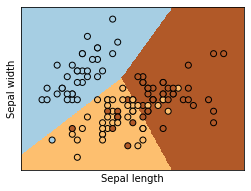

In [101]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

**Ex. 3.:** Using method predict_proba please predict the probability of being a member of a given class.

In [102]:
pred_prob = model.predict_proba(X_test)
print(f"10 fitst przedictions (in %): \n{np.around(pred_prob[:10,:], 3)*100}")

10 fitst przedictions (in %): 
[[24.  33.9 42.2]
 [80.7 13.2  6.1]
 [ 0.1 19.7 80.2]
 [ 5.6 67.1 27.3]
 [84.8 13.7  1.5]
 [ 0.7 51.3 48. ]
 [97.8  1.9  0.3]
 [ 6.6 55.  38.4]
 [97.1  2.6  0.3]
 [95.4  3.7  0.9]]


**Ex. 4.:** Evaluation - please assess the accuracy of the algorithms using a variety of metrics (at least 2).

In [109]:
from sklearn.metrics import accuracy_score, f1_score, jaccard_score
pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, pred)}")
print(f"F1 score: {f1_score(y_test, pred, average='micro')}")
print(f"Jaccard score: {jaccard_score(y_test, pred, average='micro')}")


Accuracy: 0.7333333333333333
F1 score: 0.7333333333333333
Jaccard score: 0.5789473684210527
